In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing few required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading and checking the first five rows of the data set
df = pd.read_csv('Demographic data.csv')
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [4]:
# Total number of rows and columns in demographic data
df.shape

(71295, 12)

In [5]:
# Data type of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [6]:
print("No. of unique values - Column wise:\n",df.nunique())

No. of unique values - Column wise:
 Application ID                                 71292
Age                                               53
Gender                                             2
Marital Status (at the time of application)        2
No of dependents                                   5
Income                                            63
Education                                          5
Profession                                         3
Type of residence                                  5
No of months in current residence                121
No of months in current company                   83
Performance Tag                                    2
dtype: int64


In [7]:
# There is few duplicate records

# lets display the duplicate records for application id
dup_app_id = df["Application ID"]
dup_customers = df[dup_app_id.isin(dup_app_id[dup_app_id.duplicated()])]
dup_customers.sort_values(by='Application ID')

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
5243,653287861,26,M,Married,3.0,25.0,Bachelor,SAL,Rented,112,58,0.0
42637,653287861,40,M,Married,5.0,32.0,Phd,SE,Rented,45,46,1.0
48602,671989187,27,M,Married,2.0,35.0,Professional,SAL,Living with Parents,108,7,0.0
59022,671989187,57,M,Married,4.0,7.0,Professional,SE,Rented,42,3,0.0
24386,765011468,57,M,Single,4.0,4.5,Bachelor,SAL,Company provided,6,56,0.0
27586,765011468,38,M,Married,4.0,4.5,Professional,SAL,Rented,6,72,0.0


In [8]:
# let's drop records with duplicate application id
df.drop_duplicates('Application ID', inplace = True)
df.shape

(71292, 12)

In [9]:
# Total number of missing values, column wise
df.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [10]:
# Missing values in percentage
round(100*(df.isnull().sum())/len(df),2)

Application ID                                 0.00
Age                                            0.00
Gender                                         0.00
Marital Status (at the time of application)    0.01
No of dependents                               0.00
Income                                         0.00
Education                                      0.17
Profession                                     0.02
Type of residence                              0.01
No of months in current residence              0.00
No of months in current company                0.00
Performance Tag                                2.00
dtype: float64

In [11]:
# Checking the total counts of non-default and default cases
df['Performance Tag'].value_counts()

0.0    66920
1.0     2947
Name: Performance Tag, dtype: int64

In [12]:
# Dropping rows with null values since we have a lot of records & imputing Performance Tag will introduce bias
# more as it's the predictor column
df.dropna(inplace = True)

In [13]:
# Column wise missing values
df.isnull().sum()

Application ID                                 0
Age                                            0
Gender                                         0
Marital Status (at the time of application)    0
No of dependents                               0
Income                                         0
Education                                      0
Profession                                     0
Type of residence                              0
No of months in current residence              0
No of months in current company                0
Performance Tag                                0
dtype: int64

In [14]:
# Remaining count of rows and column post removal of records with null value
df.shape

(69718, 12)

### EDA

In [15]:
# Total count of credit card applicants with age lesser than 18
(df['Age'] < 18).value_counts()

False    69656
True        62
Name: Age, dtype: int64

In [16]:
# Assuming a minimum age of 18 is required to get a credit card, we'll drop the records with age < 18
df.drop(df[df['Age'] < 18].index, inplace = True)
df.shape

(69656, 12)

In [17]:
# Bining the continuous feature - Age
bins = np.arange(18, df['Age'].max()+10, 10)
df['Age_bin'] = pd.cut(df['Age'], bins, include_lowest = True)
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,Age_bin
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,"(38.0, 48.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,"(28.0, 38.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,"(28.0, 38.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,"(38.0, 48.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,"(28.0, 38.0]"


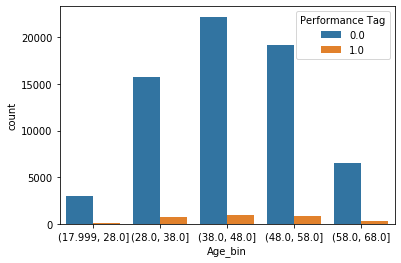

In [18]:
# Plotting Age_bin with Performance Tag
sns.countplot(data=df,x='Age_bin', hue="Performance Tag")
plt.show()

In [19]:
# Majority of default has happened from age group of 28 - 58. However we cannot assume this as the total count
# of default is very less

# Gender column
df['Gender'].value_counts()

M    53192
F    16464
Name: Gender, dtype: int64

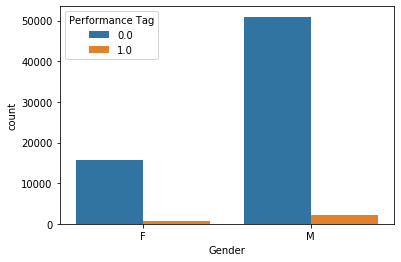

In [20]:
# Majority of applicants are male

# Plotting Gender with Performance Tag
sns.countplot(data=df,x='Gender', hue="Performance Tag")
plt.show()

In [21]:
# Males have defaulted in higher number which is due to higher number of male applicants

# Marital Status
df['Marital Status (at the time of application)'].value_counts()

Married    59385
Single     10271
Name: Marital Status (at the time of application), dtype: int64

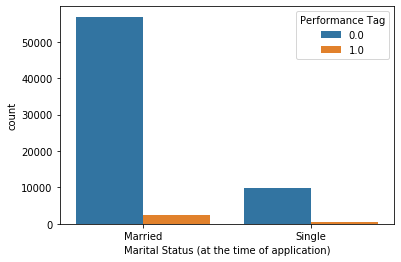

In [22]:
# Majority of applicants are Married

# Plotting Marital Status with Performance tag
sns.countplot(data = df, x = 'Marital Status (at the time of application)', hue = 'Performance Tag')
plt.show()

In [23]:
# Same result of Gender. We have more married defaulters due to higher number of married applicants

# No of dependents
df['No of dependents'].value_counts()

3.0    15591
1.0    15164
2.0    15080
4.0    11971
5.0    11850
Name: No of dependents, dtype: int64

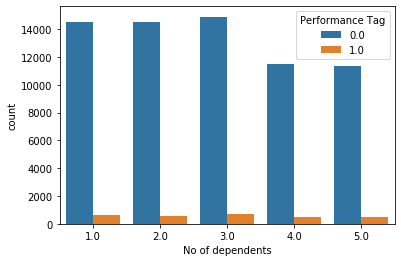

In [24]:
# We have even distribution of dependents

# Plotting dependents with Performance Tag
sns.countplot(data = df, x = 'No of dependents', hue = 'Performance Tag')
plt.show()

In [25]:
# Count of default is higher at 3 dependents but insignificant in comparison with other

# Income
df['Income'].min()

-0.5

In [26]:
# Dropping records with income less then 0, assuming that negative income is not possible
df.drop(df[df['Income'] < 0].index, inplace = True)

# Bining Income
bins = np.arange(0, df['Income'].max() + 10, 10)
df['Income_bin'] = pd.cut(df['Income'], bins, include_lowest = True)
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,Age_bin,Income_bin
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,"(38.0, 48.0]","(30.0, 40.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,"(28.0, 38.0]","(50.0, 60.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,"(28.0, 38.0]","(40.0, 50.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,"(38.0, 48.0]","(50.0, 60.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,"(28.0, 38.0]","(40.0, 50.0]"


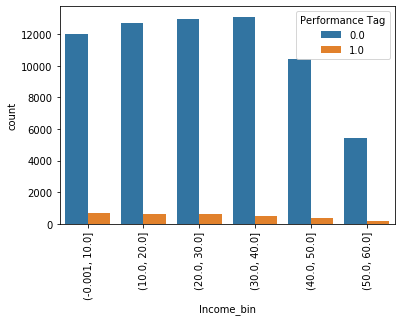

In [27]:
# Plotting Income_bin with Performance Tag
ax = sns.countplot(data = df, x = 'Income_bin', hue = 'Performance Tag')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [28]:
# Decreasing default trend is observed with the increase in income

# Education
df['Education'].value_counts()

Professional    24310
Masters         23431
Bachelor        17265
Phd              4453
Others            117
Name: Education, dtype: int64

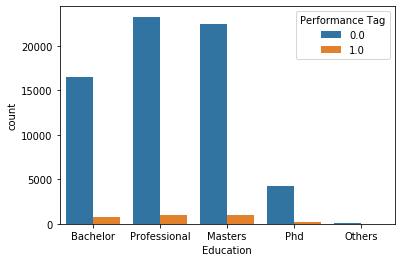

In [29]:
# Plotting education with Performance Tag
sns.countplot(data = df, x = 'Education', hue = 'Performance Tag')
plt.show()

In [30]:
# No defaulters in others, however insignificant strength for assumption.
# Count of defaulters is not significant in any education.

# Profession
df['Profession '].value_counts()

SAL        39523
SE_PROF    16177
SE         13876
Name: Profession , dtype: int64

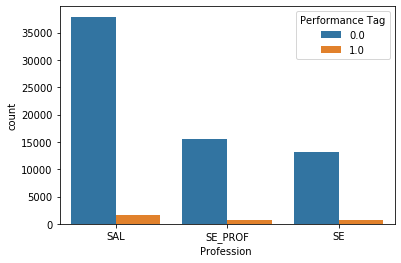

In [31]:
# Plotting Profession with Performance tag
sns.countplot(data = df, x = 'Profession ', hue = 'Performance Tag')
plt.show()

In [32]:
# SAL seems to have more defaulters but not significant

# Type of residence
df['Type of residence'].value_counts()

Rented                 52094
Owned                  13932
Living with Parents     1758
Company provided        1595
Others                   197
Name: Type of residence, dtype: int64

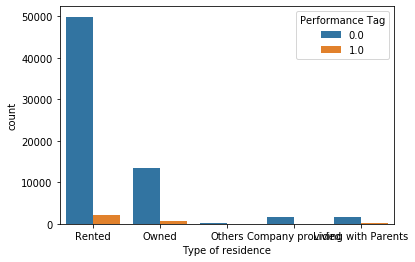

In [33]:
# Plotting Type of residence with Performance Tag
sns.countplot(data = df, x = 'Type of residence', hue = 'Performance Tag')
plt.show()

In [34]:
# Rented residence has significant number of defaulters

# No of months in current residence
(df['No of months in current residence']<1).value_counts()

False    69576
Name: No of months in current residence, dtype: int64

In [35]:
# Bining the No of months in current residence
bins = np.arange(0, df['No of months in current residence'].max() + 10, 10)
df['current_residence_bin'] = pd.cut(df['No of months in current residence'], bins, include_lowest = True)
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,Age_bin,Income_bin,current_residence_bin
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,"(38.0, 48.0]","(30.0, 40.0]","(110.0, 120.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,"(28.0, 38.0]","(50.0, 60.0]","(110.0, 120.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,"(28.0, 38.0]","(40.0, 50.0]","(100.0, 110.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,"(38.0, 48.0]","(50.0, 60.0]","(90.0, 100.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,"(28.0, 38.0]","(40.0, 50.0]","(110.0, 120.0]"


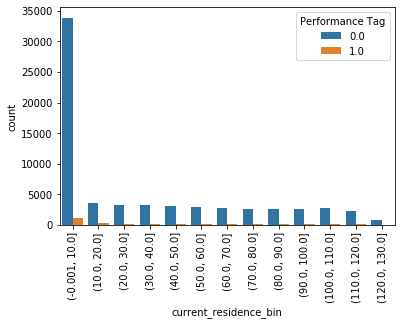

In [36]:
# Plotting the No of months in current residence with Performance Tag
ax = sns.countplot(data = df, x = 'current_residence_bin', hue = 'Performance Tag')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [37]:
# Majority of defaulters are in 0-10 group of duration of stay

# No of months in current company
(df['No of months in current company']<1).value_counts()

False    69576
Name: No of months in current company, dtype: int64

In [38]:
# Bining the duration in current company
bins = np.arange(0, df['No of months in current company'].max() + 10, 10)
df['current_company_bin'] = pd.cut(df['No of months in current company'], bins, include_lowest = True)
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,Age_bin,Income_bin,current_residence_bin,current_company_bin
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,"(38.0, 48.0]","(30.0, 40.0]","(110.0, 120.0]","(50.0, 60.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,"(28.0, 38.0]","(50.0, 60.0]","(110.0, 120.0]","(40.0, 50.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,"(28.0, 38.0]","(40.0, 50.0]","(100.0, 110.0]","(40.0, 50.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,"(38.0, 48.0]","(50.0, 60.0]","(90.0, 100.0]","(50.0, 60.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,"(28.0, 38.0]","(40.0, 50.0]","(110.0, 120.0]","(40.0, 50.0]"


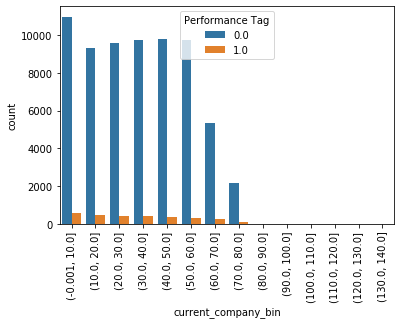

In [39]:
# Plotting No of months in current company with Performance Tag
ax = sns.countplot(data = df, x = 'current_company_bin', hue = 'Performance Tag')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [40]:
# Here we see a trend - decrease in number defaulter with increase in experience within the same company

In [41]:
# Copying the df dataframe into woe_data
woe_data = df.copy()

In [42]:
# Dropping few columns whose bins have been created
woe_data.drop(['Income','Age','No of months in current company','No of months in current residence'], axis = 1, inplace = True)

In [43]:
# WOE_DATA
woe_data = woe_data.set_index('Application ID')
woe_data.head()

,Gender,Marital Status (at the time of application),No of dependents,Education,Profession,Type of residence,Performance Tag,Age_bin,Income_bin,current_residence_bin,current_company_bin
Application ID,,,,,,,,,,,
954457215,F,Married,2.0,Bachelor,SAL,Rented,0.0,"(38.0, 48.0]","(30.0, 40.0]","(110.0, 120.0]","(50.0, 60.0]"
432830445,M,Married,4.0,Professional,SE_PROF,Rented,0.0,"(28.0, 38.0]","(50.0, 60.0]","(110.0, 120.0]","(40.0, 50.0]"
941387308,M,Single,2.0,Bachelor,SE_PROF,Rented,0.0,"(28.0, 38.0]","(40.0, 50.0]","(100.0, 110.0]","(40.0, 50.0]"
392161677,M,Married,1.0,Bachelor,SE,Rented,0.0,"(38.0, 48.0]","(50.0, 60.0]","(90.0, 100.0]","(50.0, 60.0]"
182011211,F,Married,5.0,Professional,SAL,Rented,0.0,"(28.0, 38.0]","(40.0, 50.0]","(110.0, 120.0]","(40.0, 50.0]"


In [44]:
def iv_woe(data, target, bins, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>15):
            
            binned_x = pd.cut(data[ivars], bins, include_lowest=False)
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events'] - d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [45]:
#calling the function
iv_d, woe_d = iv_woe(data = woe_data, target = 'Performance Tag', bins=8, show_woe = True)

Information value of Gender is 0.000345
  Variable Cutoff      N  Events  % of Events  Non-Events  % of Non-Events  \
0   Gender      F  16445   717.0     0.243961     15728.0         0.236025   
1   Gender      M  53131  2222.0     0.756039     50909.0         0.763975   

        WoE        IV  
0 -0.033069  0.000262  
1  0.010441  0.000083  
Information value of Marital Status (at the time of application) is 0.000109
                                      Variable   Cutoff      N  Events  \
0  Marital Status (at the time of application)  Married  59313  2495.0   
1  Marital Status (at the time of application)   Single  10263   444.0   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.848928     56818.0         0.852649  0.004374  0.000016  
1     0.151072      9819.0         0.147351 -0.024941  0.000093  
Information value of No of dependents is 0.002558
           Variable  Cutoff      N  Events  % of Events  Non-Events  \
0  No of dependents     1.0  15146

#### The important features based on Information Value are - 
- current_residence_bin
- Income_bin
- current_company_bin

In [46]:
woe_d

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Gender,F,16445,717.0,0.243961,15728.0,0.236025,-0.033069,2.624158e-04
1,Gender,M,53131,2222.0,0.756039,50909.0,0.763975,0.010441,8.285806e-05
0,Marital Status (at the time of application),Married,59313,2495.0,0.848928,56818.0,0.852649,0.004374,1.627609e-05
1,Marital Status (at the time of application),Single,10263,444.0,0.151072,9819.0,0.147351,-0.024941,9.280948e-05
0,No of dependents,1,15146,666.0,0.226608,14480.0,0.217297,-0.041957,3.906576e-04
1,No of dependents,2,15064,588.0,0.200068,14476.0,0.217237,0.082330,1.413490e-03
2,No of dependents,3,15572,692.0,0.235454,14880.0,0.223299,-0.053003,6.442474e-04
3,No of dependents,4,11958,493.0,0.167744,11465.0,0.172052,0.025354,1.092125e-04
4,No of dependents,5,11836,500.0,0.170126,11336.0,0.170116,-0.000060,6.105674e-10
0,Education,Bachelor,17265,740.0,0.251786,16525.0,0.247985,-0.015211,5.781696e-05


In [47]:
# Features in descending order of importance
iv_d.sort_values(by = 'IV', ascending = False)

,Variable,IV
0,current_residence_bin,0.074162
0,Income_bin,0.040665
0,current_company_bin,0.024534
0,No of dependents,0.002558
0,Profession,0.002244
0,Age_bin,0.001607
0,Type of residence,0.000908
0,Education,0.000792
0,Gender,0.000345
0,Marital Status (at the time of application),0.000109


In [48]:
woe_demo = iv_d[iv_d['IV'] > 0.02]
woe_demo.sort_values(by = 'IV', ascending = False)

,Variable,IV
0,current_residence_bin,0.074162
0,Income_bin,0.040665
0,current_company_bin,0.024534


In [49]:
# Copying the data
df2 = df.copy()

### Data Preparation

In [50]:
# Removing features as per IV
df2.drop(['Age_bin','Income_bin','current_residence_bin','current_company_bin'], axis=1, inplace=True)
df2.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [51]:
# Removing features as per IV
df2.drop(['Age','Gender','Marital Status (at the time of application)','No of dependents','Education','Profession ',
         'Type of residence'], axis=1, inplace=True)
df2.head()

,Application ID,Income,No of months in current residence,No of months in current company,Performance Tag
0,954457215,40.0,113,56,0.0
1,432830445,55.0,112,46,0.0
2,941387308,46.0,104,49,0.0
3,392161677,53.0,94,53,0.0
4,182011211,44.0,112,43,0.0


In [52]:
df2 = df2.set_index('Application ID')

In [53]:
# Importing library to split the data set into train and test
from sklearn.model_selection import train_test_split

In [54]:
# Every other feature except Performance Tag in X
X = df2.drop(['Performance Tag'], axis=1)

# Storing performance tag in y
y = df2['Performance Tag']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=100)

#### Scaling

In [56]:
# Importing library for scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

var  =['Income','No of months in current residence','No of months in current company']

# Scaling the train data
X_train[var] = scaler.fit_transform(X_train[var])

In [57]:
# Scaling the test data
X_test[var] = scaler.transform(X_test[var])

### Modelling

In [58]:
# Importing statsmodels for statistical summary
import statsmodels.api as sm

In [59]:
# Importing Logistic Regression and metrics
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [60]:
# Fitting the model - Model 1
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48703
Model:                            GLM   Df Residuals:                    48699
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8374.4
Date:                Mon, 09 Mar 2020   Deviance:                       16749.
Time:                        15:33:12   Pearson chi2:                 4.88e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1615      0.023   -136.130      0.000      -3.207      -3.116
Income                               -0.2047      0.024     -8.711      0.000      -0.251      -0.159
No of months in current residence     0.0550      0.022      2.470      0.014       0.011       0.099
No of months in current company      -0.0966      0.023     -4.192      0.000      -0.142      -0.051
=====================================================================================================
"""

In [61]:
# Fitting the model - Model 2
logistic = LogisticRegression(class_weight = 'balanced')

logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
# Importing library
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score

In [63]:
# Predict default for test data
y_pred = logistic.predict(X_test)

# creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average = 'binary')
print("Sensiticity: \t", round(sensitivity,2),'\n','Specificity: \t',round(specificity,2), sep = '')

# check area under curve
y_pred_prob = logistic.predict_proba(X_test)[:,1]
print('AUC: \t',round(roc_auc_score(y_test, y_pred_prob),2))

[[10708  9252]
 [  408   505]]
Sensiticity: 	0.55
Specificity: 	0.54
AUC: 	 0.57


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.54      0.69     19960
         1.0       0.05      0.55      0.09       913

    accuracy                           0.54     20873
   macro avg       0.51      0.54      0.39     20873
weighted avg       0.92      0.54      0.66     20873



## Credit Bureau

In [65]:
# Loading the second data set
cb = pd.read_csv('Credit Bureau data.csv')
cb.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [66]:
# Total rows and columns
cb.shape

(71295, 19)

In [67]:
print("No. of unique values - Column wise:\n",cb.nunique())

No. of unique values - Column wise:
 Application ID                                                     71292
No of times 90 DPD or worse in last 6 months                           4
No of times 60 DPD or worse in last 6 months                           6
No of times 30 DPD or worse in last 6 months                           8
No of times 90 DPD or worse in last 12 months                          6
No of times 60 DPD or worse in last 12 months                          8
No of times 30 DPD or worse in last 12 months                         10
Avgas CC Utilization in last 12 months                               114
No of trades opened in last 6 months                                  13
No of trades opened in last 12 months                                 29
No of PL trades opened in last 6 months                                7
No of PL trades opened in last 12 months                              13
No of Inquiries in last 6 months (excluding home & auto loans)        11
No of Inquirie

In [68]:
# There is few duplicate records

# lets display the duplicate records for application id
dup_app_id = cb["Application ID"]
dup_customers = cb[dup_app_id.isin(dup_app_id[dup_app_id.duplicated()])]
dup_customers.sort_values(by='Application ID')

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
5243,653287861,0,0,0,0,0,0,15.0,0.0,0,0,0,0,0,0.0,10494.0,2,0,0.0
42637,653287861,1,1,1,2,2,2,113.0,2.0,5,1,3,1,3,0.0,628075.0,6,0,1.0
48602,671989187,1,2,3,2,2,3,63.0,2.0,6,1,4,3,5,0.0,806473.0,7,1,0.0
59022,671989187,0,1,2,0,2,3,76.0,3.0,7,1,4,2,6,0.0,822298.0,7,0,0.0
24386,765011468,0,0,0,0,0,0,11.0,1.0,2,0,1,2,2,0.0,212656.0,3,0,0.0
27586,765011468,0,0,0,0,0,0,11.0,1.0,3,0,0,1,3,0.0,29817.0,6,0,0.0


In [69]:
# let's drop records with duplicate application id
cb.drop_duplicates('Application ID', inplace = True)
cb.shape

(71292, 19)

In [70]:
# data types of columns
cb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71292 non-null int64
No of times 90 DPD or worse in last 6 months                       71292 non-null int64
No of times 60 DPD or worse in last 6 months                       71292 non-null int64
No of times 30 DPD or worse in last 6 months                       71292 non-null int64
No of times 90 DPD or worse in last 12 months                      71292 non-null int64
No of times 60 DPD or worse in last 12 months                      71292 non-null int64
No of times 30 DPD or worse in last 12 months                      71292 non-null int64
Avgas CC Utilization in last 12 months                             70234 non-null float64
No of trades opened in last 6 months                               71291 non-null float64
No of trades opened in last 12 months                              71292 non-null int64
No of P

In [71]:
# count of null values across columns
cb.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [72]:
# percentage of null values in columns
round(100*(cb.isnull().sum())/len(cb),2)

Application ID                                                     0.00
No of times 90 DPD or worse in last 6 months                       0.00
No of times 60 DPD or worse in last 6 months                       0.00
No of times 30 DPD or worse in last 6 months                       0.00
No of times 90 DPD or worse in last 12 months                      0.00
No of times 60 DPD or worse in last 12 months                      0.00
No of times 30 DPD or worse in last 12 months                      0.00
Avgas CC Utilization in last 12 months                             1.48
No of trades opened in last 6 months                               0.00
No of trades opened in last 12 months                              0.00
No of PL trades opened in last 6 months                            0.00
No of PL trades opened in last 12 months                           0.00
No of Inquiries in last 6 months (excluding home & auto loans)     0.00
No of Inquiries in last 12 months (excluding home & auto loans) 

In [73]:
# Dropping records with null value
cb.dropna(inplace=True)
cb.shape

(68844, 19)

In [74]:
df = df.set_index('Application ID')
cb = cb.set_index('Application ID')

In [75]:
# merging the demographic and credit bureau data
merged = df.merge(cb, left_index = True, right_index = True)
merged.head()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
Application ID,,,,,,,,,,,,,,,,,,,,,
954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,...,2,0,0,0,0,1.0,2999395.0,4,0,0.0
432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,...,2,0,0,0,0,0.0,3078.0,5,0,0.0
941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,...,0,0,0,0,0,1.0,3004972.0,2,0,0.0
392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,...,1,0,0,0,0,1.0,3355373.0,4,1,0.0
182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,...,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [76]:
merged.shape

(68561, 33)

In [77]:
merged.isnull().sum()

Age                                                                0
Gender                                                             0
Marital Status (at the time of application)                        0
No of dependents                                                   0
Income                                                             0
Education                                                          0
Profession                                                         0
Type of residence                                                  0
No of months in current residence                                  0
No of months in current company                                    0
Performance Tag_x                                                  0
Age_bin                                                            0
Income_bin                                                         0
current_residence_bin                                              0
current_company_bin               

### EDA

In [78]:
# Bining few feaures
merged['Avgas CC Utilization in last 12 months_Bins']  = pd.cut(merged['Avgas CC Utilization in last 12 months'] , 10, include_lowest=True)
merged['No of trades opened in last 6 months_Bins']  = pd.cut(merged['No of trades opened in last 6 months'] , 10, include_lowest=True)
merged['No of trades opened in last 12 months_Bins']  = pd.cut(merged['No of trades opened in last 12 months'] , 10, include_lowest=True)
merged['No of PL trades opened in last 6 months_Bins']  = pd.cut(merged['No of PL trades opened in last 6 months'] , 10, include_lowest=True)
merged['No of PL trades opened in last 12 months_Bins']  = pd.cut(merged['No of PL trades opened in last 6 months'] , 10, include_lowest=True)
merged['No of Inquiries in last 6 months (excluding home & auto loans)_Bins']  = pd.cut(merged['No of Inquiries in last 6 months (excluding home & auto loans)'] , 10, include_lowest=True)
merged['No of Inquiries in last 12 months (excluding home & auto loans)_Bins']  = pd.cut(merged['No of Inquiries in last 12 months (excluding home & auto loans)'] , 10, include_lowest=True)
merged['Total No of Trades_Bins']  = pd.cut(merged['Total No of Trades'] , 10, include_lowest=True)
merged['Outstanding Balance_Bins']  = pd.cut(merged['Outstanding Balance'] , 10, include_lowest=True)

In [79]:
bins = ['Avgas CC Utilization in last 12 months_Bins',
       'No of trades opened in last 6 months_Bins',
       'No of trades opened in last 12 months_Bins',
       'No of PL trades opened in last 6 months_Bins',
       'No of PL trades opened in last 12 months_Bins',
       'No of Inquiries in last 6 months (excluding home & auto loans)_Bins',
       'No of Inquiries in last 12 months (excluding home & auto loans)_Bins',
       'Total No of Trades_Bins',
       'Outstanding Balance_Bins',
       'Income_bin',
       'current_residence_bin',
       'current_company_bin']

non_bins = ['Gender',
           'Marital Status (at the time of application)',
           'No of dependents','Education','Profession ','Type of residence',
           'No of times 90 DPD or worse in last 6 months',
           'No of times 60 DPD or worse in last 6 months',
           'No of times 30 DPD or worse in last 6 months',
           'No of times 90 DPD or worse in last 12 months',
           'No of times 60 DPD or worse in last 12 months',
           'No of times 30 DPD or worse in last 12 months',
           'Presence of open home loan',
           'Presence of open auto loan']

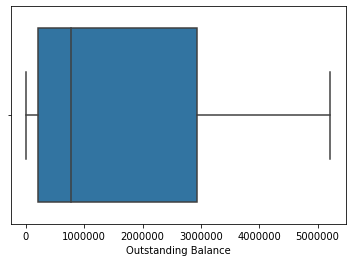

In [80]:
# Outstanding Balance
sns.boxplot(x='Outstanding Balance', data=merged)
plt.show()

In [81]:
# Importing data for WOE and IV score
woe_df = merged.drop(['Age', 'No of months in current residence', 'No of months in current company','Income','Performance Tag_y',
                      'Avgas CC Utilization in last 12 months','No of trades opened in last 6 months','No of trades opened in last 12 months',
                     'No of PL trades opened in last 6 months','No of PL trades opened in last 12 months',
                     'No of Inquiries in last 6 months (excluding home & auto loans)','No of Inquiries in last 12 months (excluding home & auto loans)',
                     'Total No of Trades','Outstanding Balance'], axis=1)

In [82]:
woe_df.columns

Index(['Gender', 'Marital Status (at the time of application)',
       'No of dependents', 'Education', 'Profession ', 'Type of residence',
       'Performance Tag_x', 'Age_bin', 'Income_bin', 'current_residence_bin',
       'current_company_bin', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Presence of open home loan', 'Presence of open auto loan',
       'Avgas CC Utilization in last 12 months_Bins',
       'No of trades opened in last 6 months_Bins',
       'No of trades opened in last 12 months_Bins',
       'No of PL trades opened in last 6 months_Bins',
       'No of PL trades opened in last 12 months_Bins',
       'No of Inquiries in last 6 months (excluding home & auto loans)_Bins',
       'No 

In [83]:
#calling the function
iv_m, woe_m = iv_woe(data = woe_df, target = 'Performance Tag_x', bins=8, show_woe = True)

Information value of Gender is 0.000282
  Variable Cutoff      N  Events  % of Events  Non-Events  % of Non-Events  \
0   Gender      F  16201   703.0     0.243168     15498.0         0.235998   
1   Gender      M  52360  2188.0     0.756832     50172.0         0.764002   

        WoE        IV  
0 -0.029930  0.000215  
1  0.009429  0.000068  
Information value of Marital Status (at the time of application) is 9.7e-05
                                      Variable   Cutoff      N  Events  \
0  Marital Status (at the time of application)  Married  58428  2454.0   
1  Marital Status (at the time of application)   Single  10133   437.0   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.848841     55974.0         0.852353  0.004128  0.000014  
1     0.151159      9696.0         0.147647 -0.023504  0.000083  
Information value of No of dependents is 0.002893
           Variable  Cutoff      N  Events  % of Events  Non-Events  \
0  No of dependents     1.0  14929 

5     0.001730        30.0         0.000457 -1.331280  0.001694  
Information value of No of times 60 DPD or worse in last 12 months is 0.192017
                                        Variable  Cutoff      N  Events  \
0  No of times 60 DPD or worse in last 12 months       0  44755  1334.0   
1  No of times 60 DPD or worse in last 12 months       1  12683   657.0   
2  No of times 60 DPD or worse in last 12 months       2   6400   481.0   
3  No of times 60 DPD or worse in last 12 months       3   3181   271.0   
4  No of times 60 DPD or worse in last 12 months       4   1036   100.0   
5  No of times 60 DPD or worse in last 12 months       5    389    35.0   
6  No of times 60 DPD or worse in last 12 months       6    110    13.0   
7  No of times 60 DPD or worse in last 12 months       7      7     0.0   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.461432     43421.0         0.661200  0.359722  0.071861  
1     0.227257     12026.0         0.183128 -0.

Information value of No of PL trades opened in last 6 months_Bins is 0.234959
                                       Variable         Cutoff      N  Events  \
0  No of PL trades opened in last 6 months_Bins  (-0.007, 0.6]  29906   653.0   
1  No of PL trades opened in last 6 months_Bins     (0.6, 1.2]  13502   689.0   
2  No of PL trades opened in last 6 months_Bins     (1.2, 1.8]      0     0.0   
3  No of PL trades opened in last 6 months_Bins     (1.8, 2.4]  12521   801.0   
4  No of PL trades opened in last 6 months_Bins     (2.4, 3.0]   7919   497.0   
5  No of PL trades opened in last 6 months_Bins     (3.0, 3.6]      0     0.0   
6  No of PL trades opened in last 6 months_Bins     (3.6, 4.2]   3331   195.0   
7  No of PL trades opened in last 6 months_Bins     (4.2, 4.8]      0     0.0   
8  No of PL trades opened in last 6 months_Bins     (4.8, 5.4]   1087    48.0   
9  No of PL trades opened in last 6 months_Bins     (5.4, 6.0]    295     8.0   

   % of Events  Non-Events  % 

9        12.0         0.000183  0.055014  5.381096e-07  
Information value of Outstanding Balance_Bins is 0.19691
                   Variable                          Cutoff      N  Events  \
0  Outstanding Balance_Bins  (-5218.802000000001, 521880.1]  24629   725.0   
1  Outstanding Balance_Bins           (521880.1, 1043760.2]  18598  1152.0   
2  Outstanding Balance_Bins          (1043760.2, 1565640.3]   6303   364.0   
3  Outstanding Balance_Bins          (1565640.3, 2087520.4]    987    44.0   
4  Outstanding Balance_Bins          (2087520.4, 2609400.5]     82     2.0   
5  Outstanding Balance_Bins          (2609400.5, 3131280.6]   9692   167.0   
6  Outstanding Balance_Bins          (3131280.6, 3653160.7]   4829   245.0   
7  Outstanding Balance_Bins          (3653160.7, 4175040.8]   2558   143.0   
8  Outstanding Balance_Bins          (4175040.8, 4696920.9]    807    42.0   
9  Outstanding Balance_Bins          (4696920.9, 5218801.0]     76     7.0   

   % of Events  Non-Events 

In [84]:
woe_m

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Gender,F,16201,703.0,0.243168,15498.0,0.235998,-0.029930,0.000215
1,Gender,M,52360,2188.0,0.756832,50172.0,0.764002,0.009429,0.000068
0,Marital Status (at the time of application),Married,58428,2454.0,0.848841,55974.0,0.852353,0.004128,0.000014
1,Marital Status (at the time of application),Single,10133,437.0,0.151159,9696.0,0.147647,-0.023504,0.000083
0,No of dependents,1,14929,660.0,0.228295,14269.0,0.217283,-0.049435,0.000544
...,...,...,...,...,...,...,...,...,...
5,Outstanding Balance_Bins,"(2609400.5, 3131280.6]",9692,167.0,0.057765,9525.0,0.145043,0.920642,0.080352
6,Outstanding Balance_Bins,"(3131280.6, 3653160.7]",4829,245.0,0.084746,4584.0,0.069804,-0.193971,0.002898
7,Outstanding Balance_Bins,"(3653160.7, 4175040.8]",2558,143.0,0.049464,2415.0,0.036775,-0.296430,0.003761
8,Outstanding Balance_Bins,"(4175040.8, 4696920.9]",807,42.0,0.014528,765.0,0.011649,-0.220834,0.000636


In [85]:
# Variable sorted in descending order as per IV score
iv_m.sort_values(by = 'IV', ascending = False)

,Variable,IV
0,Avgas CC Utilization in last 12 months_Bins,0.314136
0,No of trades opened in last 12 months_Bins,0.307705
0,No of times 30 DPD or worse in last 6 months,0.249903
0,No of PL trades opened in last 12 months_Bins,0.234959
0,No of PL trades opened in last 6 months_Bins,0.234959
0,No of times 30 DPD or worse in last 12 months,0.223249
0,No of times 90 DPD or worse in last 12 months,0.220423
0,No of times 60 DPD or worse in last 6 months,0.215684
0,Total No of Trades_Bins,0.205782
0,Outstanding Balance_Bins,0.196910


In [86]:
# The best features as per IV score
woe_credit = iv_m[iv_m['IV'] > 0.02]
woe_credit.sort_values(by = 'IV', ascending = False)

,Variable,IV
0,Avgas CC Utilization in last 12 months_Bins,0.314136
0,No of trades opened in last 12 months_Bins,0.307705
0,No of times 30 DPD or worse in last 6 months,0.249903
0,No of PL trades opened in last 12 months_Bins,0.234959
0,No of PL trades opened in last 6 months_Bins,0.234959
0,No of times 30 DPD or worse in last 12 months,0.223249
0,No of times 90 DPD or worse in last 12 months,0.220423
0,No of times 60 DPD or worse in last 6 months,0.215684
0,Total No of Trades_Bins,0.205782
0,Outstanding Balance_Bins,0.196910


In [87]:
# Copy of merged data
master_woe = pd.DataFrame(merged).copy()

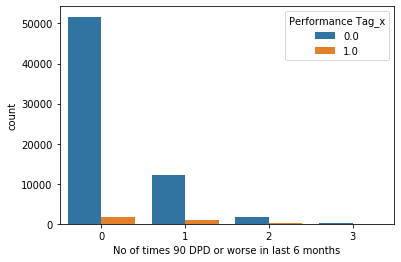

In [88]:
# Plotting No of times 90 DPD or worse in last 6 months with Performance Tag
sns.countplot(data = woe_df, x = 'No of times 90 DPD or worse in last 6 months', hue = 'Performance Tag_x')
plt.show()

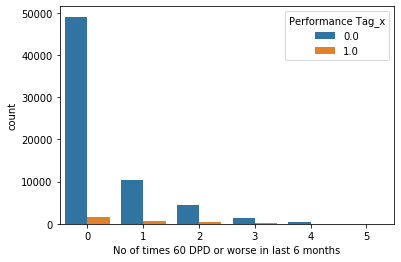

In [89]:
# Prospects have been given credit even after 90 DPD

# Plotting No of times 60 DPD or worse in last 6 months with Performance Tag
sns.countplot(data = woe_df, x = 'No of times 60 DPD or worse in last 6 months', hue = 'Performance Tag_x')
plt.show()

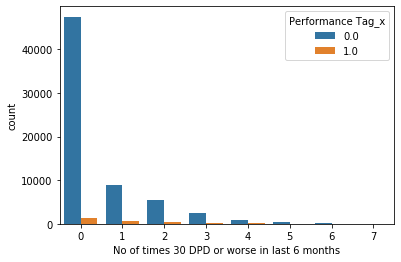

In [90]:
# Prospects have been given credit even after 60 DPD

# Plotting No of times 30 DPD or worse in last 6 months with Performance Tag
sns.countplot(data = woe_df, x = 'No of times 30 DPD or worse in last 6 months', hue = 'Performance Tag_x')
plt.show()

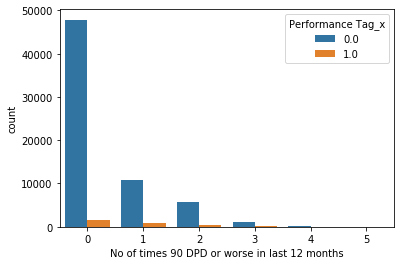

In [91]:
#Prospects have been given credit after 30 DPD

# Plotting No of times 90 DPD or worse in last 12 months with Performance Tag
sns.countplot(data = woe_df, x = 'No of times 90 DPD or worse in last 12 months', hue = 'Performance Tag_x')
plt.show()

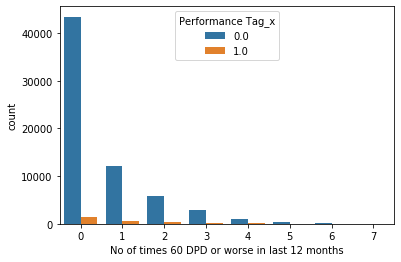

In [92]:
# Prospects have been given credit even after 90 DPD

# Plotting No of times 60 DPD or worse in last 12 months with Performance Tag
sns.countplot(data = woe_df, x = 'No of times 60 DPD or worse in last 12 months', hue = 'Performance Tag_x')
plt.show()

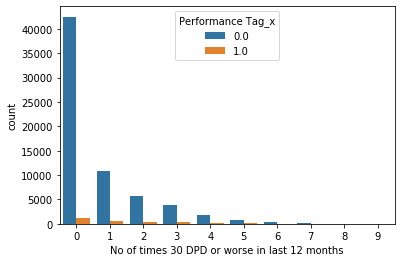

In [93]:
# Prospects have been given credit even after 60 DPD

# Plotting No of times 30 DPD or worse in last 12 months with Performance Tag
sns.countplot(data = woe_df, x = 'No of times 30 DPD or worse in last 12 months', hue = 'Performance Tag_x')
plt.show()

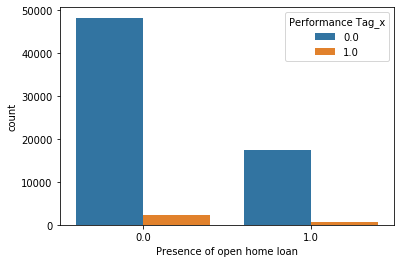

In [94]:
# Prospects have been given credit after 30 DPD

# Plotting Presence of open home loan with Performance Tag
sns.countplot(data = woe_df, x = 'Presence of open home loan', hue = 'Performance Tag_x')
plt.show()

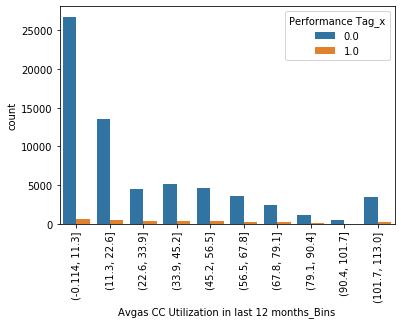

In [95]:
# Default is lower in prospects with open home loan

# Plotting Avgas CC Utilization in last 12 months_Bins with Performance Tag_x
ax = sns.countplot(data = woe_df, x='Avgas CC Utilization in last 12 months_Bins', hue = 'Performance Tag_x')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

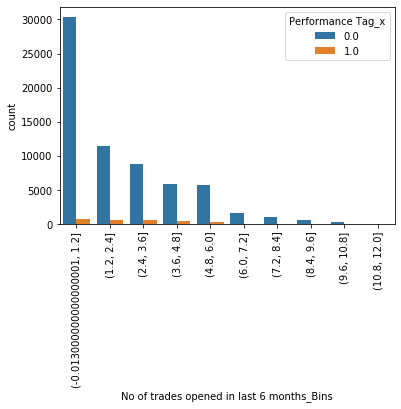

In [96]:
# Default decreases with decrease in CC utilization

# Plotting No of trades opened in last 6 months_Bins with Performance Tag_x
ax = sns.countplot(data = woe_df, x='No of trades opened in last 6 months_Bins', hue = 'Performance Tag_x')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

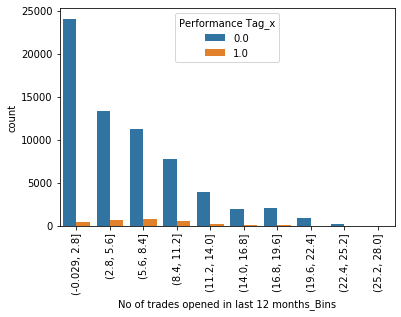

In [97]:
# Default decreases with decrease in trades opened

# Plotting No of trades opened in last 12 months_Bins with Performance Tag_x
ax = sns.countplot(data = woe_df, x='No of trades opened in last 12 months_Bins', hue = 'Performance Tag_x')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

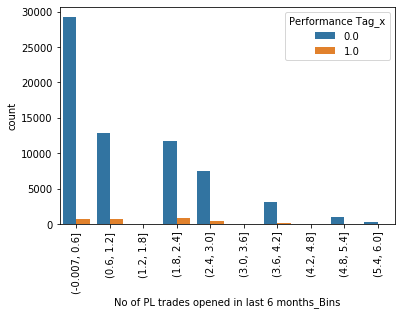

In [98]:
# Default decreases with decrease in trades opened

# Plotting No of PL trades opened in last 6 months_Bins with Performance Tag_x
ax = sns.countplot(data = woe_df, x='No of PL trades opened in last 6 months_Bins', hue = 'Performance Tag_x')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

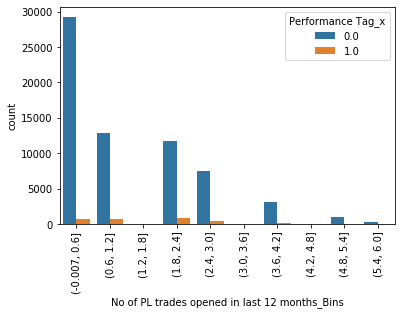

In [99]:
# Default decreases with decrease in PL trades opened

# Plotting No of PL trades opened in last 12 months_Bins with Performance Tag_x
ax = sns.countplot(data = woe_df, x='No of PL trades opened in last 12 months_Bins', hue = 'Performance Tag_x')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

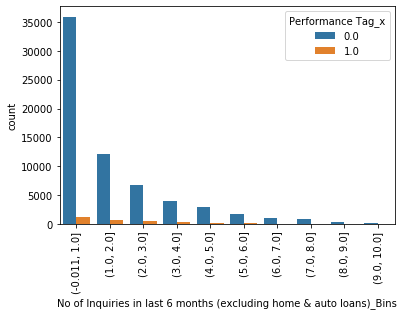

In [100]:
# Default decreases with decrease in PL trades opened

# Plotting No of Inquiries in last 6 months (excluding home & auto loans)_Bins with Performance Tag_x
ax = sns.countplot(data = woe_df, x='No of Inquiries in last 6 months (excluding home & auto loans)_Bins', hue = 'Performance Tag_x')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

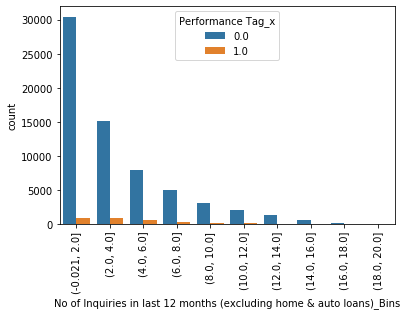

In [101]:
# Default decreases with decrease in inquiries

# Plotting No of Inquiries in last 12 months (excluding home & auto loans)_Bins with Performance Tag_x
ax = sns.countplot(data = woe_df, x='No of Inquiries in last 12 months (excluding home & auto loans)_Bins', hue = 'Performance Tag_x')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

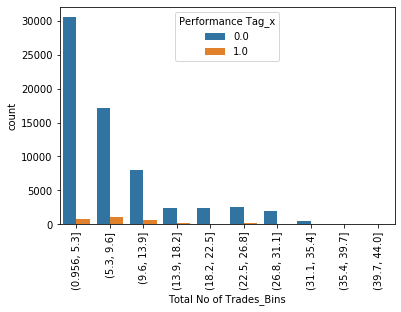

In [102]:
# Default decreases with decrease in inquiries

# Plotting Total no of Trades_Bins with Performance Tag_x
ax = sns.countplot(data = woe_df, x='Total No of Trades_Bins', hue = 'Performance Tag_x')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [103]:
# Default decreases with higher no of trades

final = merged.copy()
final.head()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,Performance Tag_y,Avgas CC Utilization in last 12 months_Bins,No of trades opened in last 6 months_Bins,No of trades opened in last 12 months_Bins,No of PL trades opened in last 6 months_Bins,No of PL trades opened in last 12 months_Bins,No of Inquiries in last 6 months (excluding home & auto loans)_Bins,No of Inquiries in last 12 months (excluding home & auto loans)_Bins,Total No of Trades_Bins,Outstanding Balance_Bins
Application ID,,,,,,,,,,,,,,,,,,,,,
954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,...,0.0,"(-0.114, 11.3]","(-0.013000000000000001, 1.2]","(-0.029, 2.8]","(-0.007, 0.6]","(-0.007, 0.6]","(-0.011, 1.0]","(-0.021, 2.0]","(0.956, 5.3]","(2609400.5, 3131280.6]"
432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,...,0.0,"(-0.114, 11.3]","(-0.013000000000000001, 1.2]","(-0.029, 2.8]","(-0.007, 0.6]","(-0.007, 0.6]","(-0.011, 1.0]","(-0.021, 2.0]","(0.956, 5.3]","(-5218.802000000001, 521880.1]"
941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,...,0.0,"(-0.114, 11.3]","(-0.013000000000000001, 1.2]","(-0.029, 2.8]","(-0.007, 0.6]","(-0.007, 0.6]","(-0.011, 1.0]","(-0.021, 2.0]","(0.956, 5.3]","(2609400.5, 3131280.6]"
392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,...,0.0,"(-0.114, 11.3]","(-0.013000000000000001, 1.2]","(-0.029, 2.8]","(-0.007, 0.6]","(-0.007, 0.6]","(-0.011, 1.0]","(-0.021, 2.0]","(0.956, 5.3]","(3131280.6, 3653160.7]"
182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,...,0.0,"(11.3, 22.6]","(-0.013000000000000001, 1.2]","(-0.029, 2.8]","(-0.007, 0.6]","(-0.007, 0.6]","(-0.011, 1.0]","(-0.021, 2.0]","(0.956, 5.3]","(2609400.5, 3131280.6]"


In [104]:
# Dropping all irrelavant columns as per IV score
final.drop(['Age','Gender','Marital Status (at the time of application)','No of dependents','Education','Profession ',
           'Type of residence','Presence of open home loan','Presence of open auto loan','Performance Tag_y'], axis=1, inplace=True)

In [105]:
final.drop(['Age_bin','Income_bin','current_residence_bin','current_company_bin','Avgas CC Utilization in last 12 months_Bins',
           'No of trades opened in last 6 months_Bins','No of trades opened in last 12 months_Bins','No of PL trades opened in last 6 months_Bins',
           'No of PL trades opened in last 12 months_Bins','No of Inquiries in last 6 months (excluding home & auto loans)_Bins',
           'No of Inquiries in last 12 months (excluding home & auto loans)_Bins','Total No of Trades_Bins','Outstanding Balance_Bins'], axis=1, inplace=True)

In [106]:
final.head()

,Income,No of months in current residence,No of months in current company,Performance Tag_x,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Outstanding Balance,Total No of Trades
Application ID,,,,,,,,,,,,,,,,,,,
954457215,40.0,113,56,0.0,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,2999395.0,4
432830445,55.0,112,46,0.0,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,3078.0,5
941387308,46.0,104,49,0.0,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,3004972.0,2
392161677,53.0,94,53,0.0,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,3355373.0,4
182011211,44.0,112,43,0.0,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,3014283.0,4


In [107]:
final.columns

Index(['Income', 'No of months in current residence',
       'No of months in current company', 'Performance Tag_x',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Outstanding Balance', 'Total No of Trades'],
      dtype='object')

In [108]:
# Separating X and y data
X1 = final.drop(['Performance Tag_x'], axis=1)

y1 = final['Performance Tag_x']

In [109]:
# Splitting the data into train and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size = 0.7, test_size = 0.3, random_state=100)

In [110]:
X_train1.head()

,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Outstanding Balance,Total No of Trades
Application ID,,,,,,,,,,,,,,,,,,
920875059,29.0,6,52,0,0,0,0,0,0,5.0,1.0,1,0,0,1,2,1946.0,2
763193709,41.0,6,5,0,0,0,0,0,0,8.0,4.0,11,3,7,4,8,1381756.0,13
875367497,19.0,108,12,1,1,1,1,1,2,75.0,3.0,9,2,4,2,4,796673.0,9
861543844,45.0,77,71,0,0,0,0,1,1,54.0,3.0,5,2,2,2,4,403715.0,6
734078267,30.0,55,61,0,0,0,0,0,0,18.0,7.0,16,4,8,8,16,1572577.0,23


#### Scaling

In [111]:
# Scaling the train data

num_var  =['Income', 'No of months in current residence',
       'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Outstanding Balance',
       'Total No of Trades']
X_train1[num_var] = scaler.fit_transform(X_train1[num_var])

In [112]:
X_test1[num_var] = scaler.transform(X_test1[num_var])

### Modelling

In [113]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
# Logistic regression model
logm2 = sm.GLM(y_train1,(sm.add_constant(X_train1)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_x   No. Observations:                47992
Model:                            GLM   Df Residuals:                    47973
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7957.1
Date:                Mon, 09 Mar 2020   Deviance:                       15914.
Time:                        15:33:32   Pearson chi2:                 4.67e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.2969      0.026   -125.703      0.000      -3.348      -3.246
Income                                                             -0.0576      0.025     -2.333      0.020      -0.106      -0.009
No of months in current residence                                  -0.0212      0.025     -0.850      0.395      -0.070       0.028
No of months in current company                                    -0.0396      0.023     -1.693      0.090      -0.085       0.006
No of times 90 DPD or worse in last 6 months                       -0.0445      0.047     -0.940      0.347      -0.137       0.048
No of times 60 DPD or worse in last 6 months                       -0.0916      0.078     -1.172      0.241      -0.245       0.062
No of times 30 DPD or worse in last 6 months                        0.1794      0.085      2.103      0.035       0.012       0.347
No of times 90 DPD or worse in last 12 months                       0.1280      0.043      2.972      0.003       0.044       0.213
No of times 60 DPD or worse in last 12 months                       0.0219      0.056      0.390      0.696      -0.088       0.132
No of times 30 DPD or worse in last 12 months                       0.0450      0.068      0.663      0.508      -0.088       0.178
Avgas CC Utilization in last 12 months                              0.1885      0.025      7.511      0.000       0.139       0.238
No of trades opened in last 6 months                               -0.0238      0.080     -0.298      0.766      -0.180       0.133
No of trades opened in last 12 months                               0.0820      0.147      0.557      0.578      -0.207       0.371
No of PL trades opened in last 6 months                             0.1198      0.060      2.009      0.045       0.003       0.237
No of PL trades opened in last 12 months                            0.1882      0.083      2.278      0.023       0.026       0.350
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0740      0.051     -1.444      0.149      -0.174       0.026
No of Inquiries in last 12 months (excluding home & auto loans)     0.2237      0.059      3.800      0.000       0.108       0.339
Outstanding Balance                                                -0.0318      0.026     -1.230      0.219      -0.083       0.019
Total No of Trades                                                 -0.2305      0.085     -2.715      0.007      -0.397      -0.064
===================================================================================================================================
"""

### PCA

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [116]:
pca = PCA()
pca.fit(X_train1)
churn_pca = pca.fit_transform(X_train1)

In [117]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      38.69
1      64.41
2      70.86
3      76.89
4      82.23
5      86.67
6      90.49
7      93.98
8      95.72
9      96.58
10     97.36
11     98.05
12     98.65
13     99.09
14     99.45
15     99.76
16     99.90
17    100.00
dtype: float64


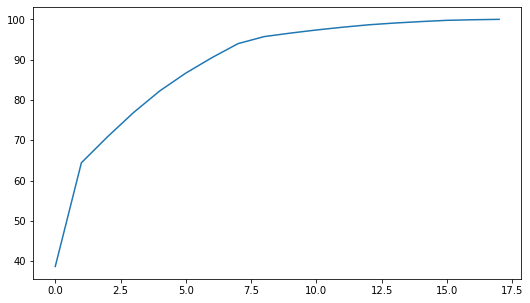

In [118]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [119]:
# create pipeline
PCA_VARS = 6
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [120]:
# fit model
pipeline.fit(X_train1, y_train1)

# check score on train data
pipeline.score(X_train1, y_train1)

0.6108309718286381

In [121]:
# predict churn on test data
y_pred1 = pipeline.predict(X_test1)

# create onfusion matrix
cm = confusion_matrix(y_test1, y_pred1)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test1, y_pred1, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob1 = pipeline.predict_proba(X_test1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test1, y_pred_prob1),2))

[[11930  7744]
 [  346   549]]
Sensitivity: 	0.61
Specificity: 	0.61
AUC:    	 0.65


In [122]:
# class imbalance
y_train1.value_counts()/y_train1.shape

0.0    0.95841
1.0    0.04159
Name: Performance Tag_x, dtype: float64

In [123]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [5,6,7,8,9,10,11,12,13,14,15,16,17,18], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [124]:
# fit model
model.fit(X_train1, y_train1)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_sca...
                                       

In [125]:
# Best Paramters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.6718317092186457
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 14}


In [126]:
# predict churn on test data
y_pred1 = model.predict(X_test1)

# create onfusion matrix
cm = confusion_matrix(y_test1, y_pred1)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test1, y_pred1, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob1 = model.predict_proba(X_test1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test1, y_pred_prob1),2))

[[11661  8013]
 [  281   614]]
Sensitivity: 	0.69
Specificity: 	0.59
AUC:    	 0.67


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

         0.0       0.98      0.59      0.74     19674
         1.0       0.07      0.69      0.13       895

    accuracy                           0.60     20569
   macro avg       0.52      0.64      0.43     20569
weighted avg       0.94      0.60      0.71     20569



#### RFE

In [128]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)

In [129]:
rfe = rfe.fit(X_train1, y_train1)
rfe.support_

array([ True, False, False, False,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True])

In [130]:
list(zip(X_train1.columns, rfe.support_, rfe.ranking_))

[('Income', True, 1),
 ('No of months in current residence', False, 7),
 ('No of months in current company', False, 3),
 ('No of times 90 DPD or worse in last 6 months', False, 2),
 ('No of times 60 DPD or worse in last 6 months', True, 1),
 ('No of times 30 DPD or worse in last 6 months', True, 1),
 ('No of times 90 DPD or worse in last 12 months', True, 1),
 ('No of times 60 DPD or worse in last 12 months', False, 6),
 ('No of times 30 DPD or worse in last 12 months', True, 1),
 ('Avgas CC Utilization in last 12 months', True, 1),
 ('No of trades opened in last 6 months', False, 5),
 ('No of trades opened in last 12 months', True, 1),
 ('No of PL trades opened in last 6 months', True, 1),
 ('No of PL trades opened in last 12 months', True, 1),
 ('No of Inquiries in last 6 months (excluding home & auto loans)', True, 1),
 ('No of Inquiries in last 12 months (excluding home & auto loans)', True, 1),
 ('Outstanding Balance', False, 4),
 ('Total No of Trades', True, 1)]

In [131]:
col = X_train1.columns[rfe.support_]
X_train1.columns[~rfe.support_]

Index(['No of months in current residence', 'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of trades opened in last 6 months', 'Outstanding Balance'],
      dtype='object')

In [132]:
# Assessing the model with statsmodels
X_train_sm = sm.add_constant(X_train1[col])
logm3 = sm.GLM(y_train1,X_train_sm, familiy = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_x   No. Observations:                47992
Model:                            GLM   Df Residuals:                    47979
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                        0.039254
Method:                          IRLS   Log-Likelihood:                 9601.0
Date:                Mon, 09 Mar 2020   Deviance:                       1883.3
Time:                        15:37:57   Pearson chi2:                 1.88e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               0.0416      0.001     45.987      0.000       0.040       0.043
Income                                                             -0.0016      0.001     -1.739      0.082      -0.003       0.000
No of times 60 DPD or worse in last 6 months                       -0.0069      0.003     -2.192      0.028      -0.013      -0.001
No of times 30 DPD or worse in last 6 months                        0.0132      0.004      3.210      0.001       0.005       0.021
No of times 90 DPD or worse in last 12 months                       0.0060      0.002      3.406      0.001       0.003       0.009
No of times 30 DPD or worse in last 12 months                       0.0028      0.003      0.946      0.344      -0.003       0.009
Avgas CC Utilization in last 12 months                              0.0063      0.001      5.908      0.000       0.004       0.008
No of trades opened in last 12 months                               0.0011      0.005      0.235      0.815      -0.008       0.010
No of PL trades opened in last 6 months                             0.0053      0.002      2.376      0.018       0.001       0.010
No of PL trades opened in last 12 months                            0.0059      0.003      1.974      0.048    4.12e-05       0.012
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0034      0.002     -1.564      0.118      -0.008       0.001
No of Inquiries in last 12 months (excluding home & auto loans)     0.0080      0.003      3.186      0.001       0.003       0.013
Total No of Trades                                                 -0.0079      0.003     -2.413      0.016      -0.014      -0.001
===================================================================================================================================
"""

In [133]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Application ID
920875059    0.020980
763193709    0.047533
875367497    0.068063
861543844    0.044009
734078267    0.058141
631136988    0.016121
602863845    0.060927
884259117    0.100205
520754832    0.059168
710216811    0.059758
dtype: float64

In [134]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.02097965, 0.04753276, 0.06806293, ..., 0.05105763, 0.07146379,
       0.04149744])

In [135]:
# Creating dataframe with acutal conversion flag and predicted probabilities
y_train_pred_final = pd.DataFrame({'Default':y_train1.values,'Default_prob':y_train_pred})
y_train_pred_final.head()

,Default,Default_prob
0,0.0,0.020980
1,0.0,0.047533
2,0.0,0.068063
3,0.0,0.044009
4,0.0,0.058141


In [136]:
# Creating new column 'Predicted'with 1 if conversion prob>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Default_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Default,Default_prob,Predicted
0,0.0,0.020980,0
1,0.0,0.047533,0
2,0.0,0.068063,0
3,0.0,0.044009,0
4,0.0,0.058141,0


In [137]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final.Predicted)
confusion

array([[45996,     0],
       [ 1996,     0]], dtype=int64)

In [138]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.Predicted)

0.9584097349558259

In [139]:
# VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
# Create dataframe that wuk contain the names of all the feature variable and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
6,No of trades opened in last 12 months,27.0
2,No of times 30 DPD or worse in last 6 months,21.0
11,Total No of Trades,13.0
1,No of times 60 DPD or worse in last 6 months,12.0
4,No of times 30 DPD or worse in last 12 months,11.0
8,No of PL trades opened in last 12 months,11.0
10,No of Inquiries in last 12 months (excluding h...,8.0
7,No of PL trades opened in last 6 months,6.0
9,No of Inquiries in last 6 months (excluding ho...,6.0
3,No of times 90 DPD or worse in last 12 months,4.0


In [141]:
col = col.drop('No of trades opened in last 12 months')
col

Index(['Income', 'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Total No of Trades'],
      dtype='object')

In [142]:
# Let's re-run the model using the updated variables
X_train_sm = sm.add_constant(X_train1[col])
logm4 = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_x   No. Observations:                47992
Model:                            GLM   Df Residuals:                    47980
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7960.5
Date:                Mon, 09 Mar 2020   Deviance:                       15921.
Time:                        15:37:58   Pearson chi2:                 4.68e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.2953      0.026   -125.814      0.000      -3.347      -3.244
Income                                                             -0.0532      0.024     -2.176      0.030      -0.101      -0.005
No of times 60 DPD or worse in last 6 months                       -0.1048      0.061     -1.725      0.085      -0.224       0.014
No of times 30 DPD or worse in last 6 months                        0.1878      0.085      2.207      0.027       0.021       0.355
No of times 90 DPD or worse in last 12 months                       0.1079      0.034      3.133      0.002       0.040       0.175
No of times 30 DPD or worse in last 12 months                       0.0558      0.066      0.843      0.399      -0.074       0.186
Avgas CC Utilization in last 12 months                              0.1853      0.025      7.527      0.000       0.137       0.234
No of PL trades opened in last 6 months                             0.1225      0.048      2.557      0.011       0.029       0.216
No of PL trades opened in last 12 months                            0.2110      0.060      3.501      0.000       0.093       0.329
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0748      0.051     -1.460      0.144      -0.175       0.026
No of Inquiries in last 12 months (excluding home & auto loans)     0.2306      0.059      3.937      0.000       0.116       0.345
Total No of Trades                                                 -0.2067      0.058     -3.560      0.000      -0.320      -0.093
===================================================================================================================================
"""

In [143]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Default_prob'] = y_train_pred

In [144]:
# Creating new column 'Predicted'with 1 if conversion prob>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Default_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Default,Default_prob,Predicted
0,0.0,0.021955,0
1,0.0,0.047969,0
2,0.0,0.067656,0
3,0.0,0.040317,0
4,0.0,0.066549,0


In [145]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.Predicted)

0.9584097349558259

In [146]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,No of times 30 DPD or worse in last 6 months,21.0
1,No of times 60 DPD or worse in last 6 months,12.0
4,No of times 30 DPD or worse in last 12 months,11.0
7,No of PL trades opened in last 12 months,8.0
9,No of Inquiries in last 12 months (excluding h...,8.0
8,No of Inquiries in last 6 months (excluding ho...,6.0
10,Total No of Trades,6.0
6,No of PL trades opened in last 6 months,5.0
3,No of times 90 DPD or worse in last 12 months,4.0
0,Income,1.0


In [147]:
col = col.drop('No of times 30 DPD or worse in last 6 months')
col

Index(['Income', 'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Total No of Trades'],
      dtype='object')

In [148]:
# Let's re-run the model using the updated variables
X_train_sm = sm.add_constant(X_train1[col])
logm5 = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_x   No. Observations:                47992
Model:                            GLM   Df Residuals:                    47981
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7962.9
Date:                Mon, 09 Mar 2020   Deviance:                       15926.
Time:                        15:37:59   Pearson chi2:                 4.68e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.2948      0.026   -125.821      0.000      -3.346      -3.244
Income                                                             -0.0546      0.024     -2.236      0.025      -0.103      -0.007
No of times 60 DPD or worse in last 6 months                       -0.0223      0.048     -0.464      0.643      -0.117       0.072
No of times 90 DPD or worse in last 12 months                       0.1100      0.034      3.194      0.001       0.043       0.178
No of times 30 DPD or worse in last 12 months                       0.1607      0.046      3.530      0.000       0.071       0.250
Avgas CC Utilization in last 12 months                              0.1849      0.025      7.513      0.000       0.137       0.233
No of PL trades opened in last 6 months                             0.1222      0.048      2.551      0.011       0.028       0.216
No of PL trades opened in last 12 months                            0.2126      0.060      3.529      0.000       0.095       0.331
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0745      0.051     -1.454      0.146      -0.175       0.026
No of Inquiries in last 12 months (excluding home & auto loans)     0.2320      0.059      3.961      0.000       0.117       0.347
Total No of Trades                                                 -0.2063      0.058     -3.555      0.000      -0.320      -0.093
===================================================================================================================================
"""

In [149]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Default_prob'] = y_train_pred

In [150]:
# Creating new column 'Predicted'with 1 if conversion prob>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Default_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Default,Default_prob,Predicted
0,0.0,0.021775,0
1,0.0,0.047864,0
2,0.0,0.073283,0
3,0.0,0.043355,0
4,0.0,0.066745,0


In [151]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.Predicted)

0.9584097349558259

In [152]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
6,No of PL trades opened in last 12 months,8.0
8,No of Inquiries in last 12 months (excluding h...,8.0
1,No of times 60 DPD or worse in last 6 months,7.0
3,No of times 30 DPD or worse in last 12 months,6.0
7,No of Inquiries in last 6 months (excluding ho...,6.0
9,Total No of Trades,6.0
5,No of PL trades opened in last 6 months,5.0
2,No of times 90 DPD or worse in last 12 months,4.0
0,Income,1.0
4,Avgas CC Utilization in last 12 months,1.0


In [153]:
col = col.drop('No of PL trades opened in last 12 months')
col

Index(['Income', 'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Total No of Trades'],
      dtype='object')

In [154]:
# Let's re-run the model using the updated variables
X_train_sm = sm.add_constant(X_train1[col])
logm5 = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_x   No. Observations:                47992
Model:                            GLM   Df Residuals:                    47982
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7969.1
Date:                Mon, 09 Mar 2020   Deviance:                       15938.
Time:                        15:38:00   Pearson chi2:                 4.68e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.2899      0.026   -126.320      0.000      -3.341      -3.239
Income                                                             -0.0585      0.024     -2.395      0.017      -0.106      -0.011
No of times 60 DPD or worse in last 6 months                       -0.0263      0.048     -0.545      0.586      -0.121       0.068
No of times 90 DPD or worse in last 12 months                       0.1198      0.034      3.479      0.001       0.052       0.187
No of times 30 DPD or worse in last 12 months                       0.1778      0.045      3.919      0.000       0.089       0.267
Avgas CC Utilization in last 12 months                              0.2042      0.024      8.548      0.000       0.157       0.251
No of PL trades opened in last 6 months                             0.2168      0.040      5.455      0.000       0.139       0.295
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0741      0.051     -1.446      0.148      -0.175       0.026
No of Inquiries in last 12 months (excluding home & auto loans)     0.2418      0.059      4.133      0.000       0.127       0.356
Total No of Trades                                                 -0.1111      0.051     -2.190      0.029      -0.210      -0.012
===================================================================================================================================
"""

In [155]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Default_prob'] = y_train_pred

In [156]:
# Creating new column 'Predicted'with 1 if conversion prob>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Default_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Default,Default_prob,Predicted
0,0.0,0.022049,0
1,0.0,0.038420,0
2,0.0,0.072199,0
3,0.0,0.046697,0
4,0.0,0.061758,0


In [157]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.Predicted)

0.9584097349558259

In [158]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
7,No of Inquiries in last 12 months (excluding h...,8.0
1,No of times 60 DPD or worse in last 6 months,7.0
3,No of times 30 DPD or worse in last 12 months,6.0
6,No of Inquiries in last 6 months (excluding ho...,6.0
8,Total No of Trades,5.0
2,No of times 90 DPD or worse in last 12 months,4.0
5,No of PL trades opened in last 6 months,4.0
0,Income,1.0
4,Avgas CC Utilization in last 12 months,1.0


In [159]:
col = col.drop('No of Inquiries in last 12 months (excluding home & auto loans)')
col

Index(['Income', 'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'Total No of Trades'],
      dtype='object')

In [160]:
# Let's re-run the model using the updated variables
X_train_sm = sm.add_constant(X_train1[col])
logm6 = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_x   No. Observations:                47992
Model:                            GLM   Df Residuals:                    47983
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7977.6
Date:                Mon, 09 Mar 2020   Deviance:                       15955.
Time:                        15:38:00   Pearson chi2:                 4.68e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                             -3.2841      0.026   -126.836      0.000      -3.335      -3.233
Income                                                            -0.0610      0.024     -2.500      0.012      -0.109      -0.013
No of times 60 DPD or worse in last 6 months                      -0.0295      0.048     -0.611      0.541      -0.124       0.065
No of times 90 DPD or worse in last 12 months                      0.1258      0.034      3.647      0.000       0.058       0.193
No of times 30 DPD or worse in last 12 months                      0.1855      0.045      4.093      0.000       0.097       0.274
Avgas CC Utilization in last 12 months                             0.2065      0.024      8.677      0.000       0.160       0.253
No of PL trades opened in last 6 months                            0.2101      0.040      5.281      0.000       0.132       0.288
No of Inquiries in last 6 months (excluding home & auto loans)     0.0931      0.031      2.964      0.003       0.032       0.155
Total No of Trades                                                -0.0389      0.047     -0.822      0.411      -0.132       0.054
==================================================================================================================================
"""

In [161]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Default_prob'] = y_train_pred

In [162]:
# Creating new column 'Predicted'with 1 if conversion prob>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Default_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Default,Default_prob,Predicted
0,0.0,0.021603,0
1,0.0,0.035762,0
2,0.0,0.073114,0
3,0.0,0.045278,0
4,0.0,0.052454,0


In [163]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.Predicted)

0.9584097349558259

In [164]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,No of times 60 DPD or worse in last 6 months,7.0
3,No of times 30 DPD or worse in last 12 months,6.0
2,No of times 90 DPD or worse in last 12 months,4.0
5,No of PL trades opened in last 6 months,4.0
7,Total No of Trades,4.0
6,No of Inquiries in last 6 months (excluding ho...,2.0
0,Income,1.0
4,Avgas CC Utilization in last 12 months,1.0


In [165]:
col = col.drop('No of times 60 DPD or worse in last 6 months')
col

Index(['Income', 'No of times 90 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'Total No of Trades'],
      dtype='object')

In [166]:
# Let's re-run the model using the updated variables
X_train_sm = sm.add_constant(X_train1[col])
logm7 = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_x   No. Observations:                47992
Model:                            GLM   Df Residuals:                    47984
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7977.7
Date:                Mon, 09 Mar 2020   Deviance:                       15955.
Time:                        15:38:01   Pearson chi2:                 4.68e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                             -3.2840      0.026   -126.851      0.000      -3.335      -3.233
Income                                                            -0.0610      0.024     -2.499      0.012      -0.109      -0.013
No of times 90 DPD or worse in last 12 months                      0.1169      0.031      3.737      0.000       0.056       0.178
No of times 30 DPD or worse in last 12 months                      0.1652      0.031      5.363      0.000       0.105       0.226
Avgas CC Utilization in last 12 months                             0.2063      0.024      8.668      0.000       0.160       0.253
No of PL trades opened in last 6 months                            0.2110      0.040      5.306      0.000       0.133       0.289
No of Inquiries in last 6 months (excluding home & auto loans)     0.0935      0.031      2.980      0.003       0.032       0.155
Total No of Trades                                                -0.0406      0.047     -0.858      0.391      -0.133       0.052
==================================================================================================================================
"""

In [167]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Default_prob'] = y_train_pred

In [168]:
# Creating new column 'Predicted'with 1 if conversion prob>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Default_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Default,Default_prob,Predicted
0,0.0,0.021660,0
1,0.0,0.035861,0
2,0.0,0.072829,0
3,0.0,0.044698,0
4,0.0,0.052557,0


In [169]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.Predicted)

0.9584097349558259

In [170]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
4,No of PL trades opened in last 6 months,4.0
6,Total No of Trades,4.0
1,No of times 90 DPD or worse in last 12 months,3.0
2,No of times 30 DPD or worse in last 12 months,3.0
5,No of Inquiries in last 6 months (excluding ho...,2.0
0,Income,1.0
3,Avgas CC Utilization in last 12 months,1.0


In [171]:
col = col.drop('Total No of Trades')
col

Index(['Income', 'No of times 90 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)'],
      dtype='object')

In [172]:
# Let's re-run the model using the updated variables
X_train_sm = sm.add_constant(X_train1[col])
logm8 = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_x   No. Observations:                47992
Model:                            GLM   Df Residuals:                    47985
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7978.1
Date:                Mon, 09 Mar 2020   Deviance:                       15956.
Time:                        15:38:02   Pearson chi2:                 4.68e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                             -3.2841      0.026   -126.821      0.000      -3.335      -3.233
Income                                                            -0.0612      0.024     -2.506      0.012      -0.109      -0.013
No of times 90 DPD or worse in last 12 months                      0.1190      0.031      3.813      0.000       0.058       0.180
No of times 30 DPD or worse in last 12 months                      0.1688      0.031      5.533      0.000       0.109       0.229
Avgas CC Utilization in last 12 months                             0.2119      0.023      9.256      0.000       0.167       0.257
No of PL trades opened in last 6 months                            0.1862      0.027      6.799      0.000       0.133       0.240
No of Inquiries in last 6 months (excluding home & auto loans)     0.0804      0.027      2.936      0.003       0.027       0.134
==================================================================================================================================
"""

In [173]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Default_prob'] = y_train_pred

In [174]:
# Creating new column 'Predicted'with 1 if conversion prob>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Default_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Default,Default_prob,Predicted
0,0.0,0.021312,0
1,0.0,0.034891,0
2,0.0,0.072966,0
3,0.0,0.043645,0
4,0.0,0.051841,0


In [175]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.Predicted)

0.9584097349558259

In [176]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,No of times 90 DPD or worse in last 12 months,3.0
2,No of times 30 DPD or worse in last 12 months,3.0
4,No of PL trades opened in last 6 months,2.0
5,No of Inquiries in last 6 months (excluding ho...,2.0
0,Income,1.0
3,Avgas CC Utilization in last 12 months,1.0


In [177]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [178]:
# Let's check the sensitivity of our model
TP/float(TP+FN)

0.0

In [179]:
# Specificity
TN/float(TN+FP)

1.0

In [180]:
def draw_roc(acutal, probs):
    fpr, tpr, thresholds = metrics.roc_curve(acutal, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(acutal, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating charateristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [181]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Default, y_train_pred_final.Default_prob, drop_intermediate=False)

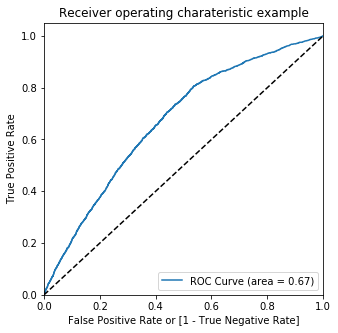

In [182]:
draw_roc(y_train_pred_final.Default, y_train_pred_final.Default_prob)

In [183]:
# Optimal cutoff point
# Creating columns with different probability cut-offs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Default_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Default,Default_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.021312,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.034891,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.072966,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.043645,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.051841,0,1,0,0,0,0,0,0,0,0,0


In [184]:
# Calculating accuracy, sensitivity and specificity for various probability cut-offs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.041590  1.000000  0.000000
0.1   0.1  0.931822  0.071142  0.969171
0.2   0.2  0.957847  0.002004  0.999326
0.3   0.3  0.958410  0.000000  1.000000
0.4   0.4  0.958410  0.000000  1.000000
0.5   0.5  0.958410  0.000000  1.000000
0.6   0.6  0.958410  0.000000  1.000000
0.7   0.7  0.958410  0.000000  1.000000
0.8   0.8  0.958410  0.000000  1.000000
0.9   0.9  0.958410  0.000000  1.000000


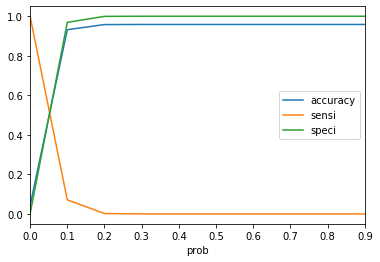

In [185]:
# Plot of accuracy, sensitivity and specificity for various probabilities
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

From the above graph, 0.05 is the optimal cutoff

In [186]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Default_prob.map(lambda x: 1 if x>0.05 else 0)
y_train_pred_final.head()

,Default,Default_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.021312,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.034891,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.072966,0,1,0,0,0,0,0,0,0,0,0,1
3,0.0,0.043645,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.051841,0,1,0,0,0,0,0,0,0,0,0,1


In [187]:
# Overall Accuracy
metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.final_predicted)

0.7078888148024671

In [188]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final.final_predicted)
confusion2

array([[32955, 13041],
       [  978,  1018]], dtype=int64)

In [189]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [190]:
# Sensitivity
TP/float(TP+FN)

0.5100200400801603

In [191]:
# Specificity
TN/float(TN+FP)

0.7164753456822333

In [192]:
# Logistic Regression - Regularized

# Cross Validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state=4)

# Range of hyperparameters
params = {'C':np.logspace(-3,3,7), 'penalty':['l1','l2']}

model = LogisticRegression(class_weight = 'balanced')
model_cv = GridSearchCV(estimator = model, param_grid = params,
                       scoring = 'recall', cv = folds,
                       return_train_score = True, verbose = 1)
model_cv.fit(X_train1, y_train1)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   11.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [193]:
## Best score
best_score = model_cv.best_score_
best_param = model_cv.best_params_

print(" The highest test recall is {0} at {1}".format(best_score, best_param))

 The highest test recall is 0.6558270676691729 at {'C': 0.01, 'penalty': 'l2'}


In [194]:
## preparing final model based on best score
model=LogisticRegression(C=0.01,penalty="l2",class_weight='balanced')
model.fit(X_train1,y_train1)

# predictions on training dataset
y_train_pred = model.predict(X_train1)

In [195]:
print(classification_report(y_train1, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.60      0.74     45996
         1.0       0.07      0.66      0.12      1996

    accuracy                           0.60     47992
   macro avg       0.52      0.63      0.43     47992
weighted avg       0.94      0.60      0.72     47992



In [196]:
# Predictions on test data
y_test_pred = model.predict(X_test1)

In [197]:
print(classification_report(y_test1, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.59      0.74     19674
         1.0       0.07      0.68      0.13       895

    accuracy                           0.60     20569
   macro avg       0.52      0.64      0.43     20569
weighted avg       0.94      0.60      0.71     20569



In [198]:
print(model.coef_)
print(model.intercept_)

[[-0.04992354 -0.04053538 -0.04451374 -0.03920918 -0.05943722  0.18975954
   0.12819775  0.00323964  0.04011314  0.21922013 -0.02688241  0.04225184
   0.12669149  0.21130257 -0.07486216  0.23708079 -0.03591976 -0.19217109]]
[-0.17419292]


In [199]:
# Storing variable wise coefficients
model_params = pd.DataFrame({'cols':X_train1.columns,'coeff':model.coef_[0]})
model_params = model_params.set_index('cols')
model_params

,coeff
cols,
Income,-0.049924
No of months in current residence,-0.040535
No of months in current company,-0.044514
No of times 90 DPD or worse in last 6 months,-0.039209
No of times 60 DPD or worse in last 6 months,-0.059437
No of times 30 DPD or worse in last 6 months,0.189760
No of times 90 DPD or worse in last 12 months,0.128198
No of times 60 DPD or worse in last 12 months,0.003240
No of times 30 DPD or worse in last 12 months,0.040113


In [200]:
# Intercept
intercept = model.intercept_[0]
intercept

-0.17419292339503242

In [201]:
master_woe = woe_m.copy()
master_woe = master_woe.set_index('Variable')
master_woe = master_woe.T
master_woe

Variable,Gender,Gender,Marital Status (at the time of application),Marital Status (at the time of application),No of dependents,No of dependents,No of dependents,No of dependents,No of dependents,Education,...,Outstanding Balance_Bins,Outstanding Balance_Bins,Outstanding Balance_Bins,Outstanding Balance_Bins,Outstanding Balance_Bins,Outstanding Balance_Bins,Outstanding Balance_Bins,Outstanding Balance_Bins,Outstanding Balance_Bins,Outstanding Balance_Bins
Cutoff,F,M,Married,Single,1,2,3,4,5,Bachelor,...,"(-5218.802000000001, 521880.1]","(521880.1, 1043760.2]","(1043760.2, 1565640.3]","(1565640.3, 2087520.4]","(2087520.4, 2609400.5]","(2609400.5, 3131280.6]","(3131280.6, 3653160.7]","(3653160.7, 4175040.8]","(4175040.8, 4696920.9]","(4696920.9, 5218801.0]"
N,16201,52360,58428,10133,14929,14856,15341,11788,11647,17005,...,24629,18598,6303,987,82,9692,4829,2558,807,76
Events,703,2188,2454,437,660,576,680,484,491,730,...,725,1152,364,44,2,167,245,143,42,7
% of Events,0.243168,0.756832,0.848841,0.151159,0.228295,0.199239,0.235213,0.167416,0.169837,0.252508,...,0.250778,0.398478,0.125908,0.0152196,0.000691802,0.0577655,0.0847458,0.0494639,0.0145278,0.00242131
Non-Events,15498,50172,55974,9696,14269,14280,14661,11304,11156,16275,...,23904,17446,5939,943,80,9525,4584,2415,765,69
% of Non-Events,0.235998,0.764002,0.852353,0.147647,0.217283,0.217451,0.223253,0.172133,0.16988,0.24783,...,0.364002,0.265662,0.090437,0.0143597,0.00121821,0.145043,0.0698036,0.0367748,0.0116492,0.00105071
WoE,-0.0299304,0.00942948,0.00412821,-0.0235042,-0.0494349,0.0874678,-0.0521863,0.0277873,0.000248884,-0.0186988,...,0.37259,-0.405429,-0.330898,-0.0581631,0.56584,0.920642,-0.193971,-0.29643,-0.220834,-0.834843
IV,0.000214609,6.7612e-05,1.4496e-05,8.25337e-05,0.000544344,0.00159295,0.000624154,0.00013108,1.05216e-08,8.74678e-05,...,0.0421859,0.0538476,0.0117373,5.00185e-05,0.000297864,0.0803517,0.00289835,0.00376142,0.000635711,0.00114424


In [202]:
master_woe.drop(['Gender','Marital Status (at the time of application)','No of dependents','Education','Profession ','Type of residence','Presence of open home loan','Age_bin'], axis=1, inplace = True)
master_woe = master_woe.T
master_woe

,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
Variable,,,,,,,,
Income_bin,"(-0.001, 10.0]",12543,696,0.240747,11847,0.180402,-0.288559,0.0174132
Income_bin,"(10.0, 20.0]",13135,599,0.207195,12536,0.190894,-0.0819416,0.00133572
Income_bin,"(20.0, 30.0]",13361,584,0.202006,12777,0.194564,-0.0375388,0.000279382
Income_bin,"(30.0, 40.0]",13386,478,0.165341,12908,0.196559,0.172952,0.00539919
Income_bin,"(40.0, 50.0]",10640,377,0.130405,10263,0.156281,0.181016,0.00468409
...,...,...,...,...,...,...,...,...
Outstanding Balance_Bins,"(2609400.5, 3131280.6]",9692,167,0.0577655,9525,0.145043,0.920642,0.0803517
Outstanding Balance_Bins,"(3131280.6, 3653160.7]",4829,245,0.0847458,4584,0.0698036,-0.193971,0.00289835
Outstanding Balance_Bins,"(3653160.7, 4175040.8]",2558,143,0.0494639,2415,0.0367748,-0.29643,0.00376142


#### Random Forest

In [203]:
#class weight to handle class imbalance
forest = RandomForestClassifier(class_weight='balanced_subsample')

# hyperparameter space
params = {'max_depth':[6,10], 'min_samples_leaf':range(50,100),
         'min_samples_split':range(50,100),
         'n_estimators':[200,300], 'max_features':[6,8]}

# create gridsearch object
rf = GridSearchCV(estimator=forest, cv=5, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [204]:
# Since below code took more than a day and still did not get completed, we have kept it aside.
#rf.fit(X_train1, y_train1)

In [205]:
# to find the the best hyperparameters the above fit code is mandatory
# print best hyperparameters
#print("Best AUC: ", rf.best_score_)
#print("Best hyperparameters: ", rf.best_params_)

In [206]:
# Model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             class_weight='balanced_subsample',
                            max_depth=6,
                            max_features=6,
                            min_samples_leaf=100,
                            min_samples_split=100,
                            n_estimators=300)

In [207]:
# fit
rfc.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=6, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [208]:
predictions = rfc.predict(X_test1)

In [209]:
# Evaluation metrics
print(classification_report(y_test1,predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.60      0.74     19674
         1.0       0.07      0.67      0.13       895

    accuracy                           0.60     20569
   macro avg       0.52      0.63      0.43     20569
weighted avg       0.94      0.60      0.71     20569



In [210]:
# create confusion matrix
cm = confusion_matrix(y_test1, predictions)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test1, predictions, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rfc.predict_proba(X_test1)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test1, predictions),2))

[[11740  7934]
 [  296   599]]
Sensitivity: 	0.67
Specificity: 	0.6
ROC:    	 0.63


In [211]:
# predictors
features = X1.columns

# feature_importance
importance = rfc.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 99.99999999999999


,variables,importance_percentage
0,Avgas CC Utilization in last 12 months,24.692451
1,No of PL trades opened in last 12 months,12.895908
2,No of Inquiries in last 12 months (excluding h...,9.666913
3,No of trades opened in last 12 months,7.744958
4,No of times 30 DPD or worse in last 6 months,7.642529
5,Outstanding Balance,5.546425
6,No of months in current residence,5.185558
7,No of times 30 DPD or worse in last 12 months,3.806857
8,No of PL trades opened in last 6 months,3.392079
9,No of months in current company,3.363533


In [212]:
#top features
top_features = feature_importance.variables[0:10]
print(top_features)

0               Avgas CC Utilization in last 12 months
1             No of PL trades opened in last 12 months
2    No of Inquiries in last 12 months (excluding h...
3                No of trades opened in last 12 months
4         No of times 30 DPD or worse in last 6 months
5                                  Outstanding Balance
6                    No of months in current residence
7        No of times 30 DPD or worse in last 12 months
8              No of PL trades opened in last 6 months
9                      No of months in current company
Name: variables, dtype: object


### Application Scorecard

In [213]:
factor = 20/np.log(2)
offset = 400 - factor * np.log(10)
print('Factor:', round(factor,2),'| Offset:', round(offset,2))

Factor: 28.85 | Offset: 333.56


In [214]:
#Factor = 28.85
#Offset  = 333.56
# Top features:
#0               Avgas CC Utilization in last 12 months
#1             No of PL trades opened in last 12 months
#2    No of Inquiries in last 12 months (excluding h...
#3                No of trades opened in last 12 months
#4         No of times 30 DPD or worse in last 6 months
#5                                  Outstanding Balance
#6                    No of months in current residence
#7        No of times 30 DPD or worse in last 12 months
#8                                               Income
#9                      No of months in current company
# number of characteristics included in the model(n) = 10
# Master WOE(WOE)
#logistic regression intercept(a)= -0.1741929233938173
# logistic regression coefficient for characteristics(B) = model_params
#Score = (β×WoE+ α/n)×Factor + Offset/n

In [226]:
model_params.info

<bound method DataFrame.info of                                                        coeff
cols                                                        
Income                                             -0.049924
No of months in current residence                  -0.040535
No of months in current company                    -0.044514
No of times 90 DPD or worse in last 6 months       -0.039209
No of times 60 DPD or worse in last 6 months       -0.059437
No of times 30 DPD or worse in last 6 months        0.189760
No of times 90 DPD or worse in last 12 months       0.128198
No of times 60 DPD or worse in last 12 months       0.003240
No of times 30 DPD or worse in last 12 months       0.040113
Avgas CC Utilization in last 12 months              0.219220
No of trades opened in last 6 months               -0.026882
No of trades opened in last 12 months               0.042252
No of PL trades opened in last 6 months             0.126691
No of PL trades opened in last 12 months            0

In [359]:
model_params.coeff[0]

-0.049923538440392955

In [218]:
model_params1 = model_params.copy()

In [230]:
model_params1 = model_params1.T

In [231]:
model_params1

cols,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Outstanding Balance,Total No of Trades
coeff,-0.049924,-0.040535,-0.044514,-0.039209,-0.059437,0.18976,0.128198,0.00324,0.040113,0.21922,-0.026882,0.042252,0.126691,0.211303,-0.074862,0.237081,-0.03592,-0.192171


In [375]:
model_params1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, coeff to coeff
Data columns (total 18 columns):
Income                                                             1 non-null float64
No of months in current residence                                  1 non-null float64
No of months in current company                                    1 non-null float64
No of times 90 DPD or worse in last 6 months                       1 non-null float64
No of times 60 DPD or worse in last 6 months                       1 non-null float64
No of times 30 DPD or worse in last 6 months                       1 non-null float64
No of times 90 DPD or worse in last 12 months                      1 non-null float64
No of times 60 DPD or worse in last 12 months                      1 non-null float64
No of times 30 DPD or worse in last 12 months                      1 non-null float64
Avgas CC Utilization in last 12 months                             1 non-null float64
No of trades opened in last 6 months

In [280]:
cols1 = model_params1.columns

In [281]:
cols1

Index(['Income', 'No of months in current residence',
       'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Outstanding Balance', 'Total No of Trades'],
      dtype='object', name='cols')

In [232]:
master_woe

,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
Variable,,,,,,,,
Income_bin,"(-0.001, 10.0]",12543,696,0.240747,11847,0.180402,-0.288559,0.0174132
Income_bin,"(10.0, 20.0]",13135,599,0.207195,12536,0.190894,-0.0819416,0.00133572
Income_bin,"(20.0, 30.0]",13361,584,0.202006,12777,0.194564,-0.0375388,0.000279382
Income_bin,"(30.0, 40.0]",13386,478,0.165341,12908,0.196559,0.172952,0.00539919
Income_bin,"(40.0, 50.0]",10640,377,0.130405,10263,0.156281,0.181016,0.00468409
...,...,...,...,...,...,...,...,...
Outstanding Balance_Bins,"(2609400.5, 3131280.6]",9692,167,0.0577655,9525,0.145043,0.920642,0.0803517
Outstanding Balance_Bins,"(3131280.6, 3653160.7]",4829,245,0.0847458,4584,0.0698036,-0.193971,0.00289835
Outstanding Balance_Bins,"(3653160.7, 4175040.8]",2558,143,0.0494639,2415,0.0367748,-0.29643,0.00376142


In [384]:
master_woe_df = master_woe.copy()

In [385]:
master_woe_df.reset_index(level=0, inplace=True)

In [389]:
master_woe_df1 = pd.DataFrame(master_woe_df)

In [399]:
master_woe_df

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Income_bin,"(-0.001, 10.0]",12543,696,0.240747,11847,0.180402,-0.288559,0.0174132
1,Income_bin,"(10.0, 20.0]",13135,599,0.207195,12536,0.190894,-0.0819416,0.00133572
2,Income_bin,"(20.0, 30.0]",13361,584,0.202006,12777,0.194564,-0.0375388,0.000279382
3,Income_bin,"(30.0, 40.0]",13386,478,0.165341,12908,0.196559,0.172952,0.00539919
4,Income_bin,"(40.0, 50.0]",10640,377,0.130405,10263,0.156281,0.181016,0.00468409
...,...,...,...,...,...,...,...,...,...
162,Outstanding Balance_Bins,"(2609400.5, 3131280.6]",9692,167,0.0577655,9525,0.145043,0.920642,0.0803517
163,Outstanding Balance_Bins,"(3131280.6, 3653160.7]",4829,245,0.0847458,4584,0.0698036,-0.193971,0.00289835
164,Outstanding Balance_Bins,"(3653160.7, 4175040.8]",2558,143,0.0494639,2415,0.0367748,-0.29643,0.00376142
165,Outstanding Balance_Bins,"(4175040.8, 4696920.9]",807,42,0.0145278,765,0.0116492,-0.220834,0.000635711


In [382]:
master_woe_df

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV,coeff
0,Income_bin,"(-0.001, 10.0]",12543,696,0.240747,11847,0.180402,-0.288559,0.0174132,-0.049924
1,Income_bin,"(10.0, 20.0]",13135,599,0.207195,12536,0.190894,-0.0819416,0.00133572,0.211303
2,Income_bin,"(20.0, 30.0]",13361,584,0.202006,12777,0.194564,-0.0375388,0.000279382,0.211303
3,Income_bin,"(30.0, 40.0]",13386,478,0.165341,12908,0.196559,0.172952,0.00539919,0.211303
4,Income_bin,"(40.0, 50.0]",10640,377,0.130405,10263,0.156281,0.181016,0.00468409,0.211303
...,...,...,...,...,...,...,...,...,...,...
162,Outstanding Balance_Bins,"(2609400.5, 3131280.6]",9692,167,0.0577655,9525,0.145043,0.920642,0.0803517,-0.035920
163,Outstanding Balance_Bins,"(3131280.6, 3653160.7]",4829,245,0.0847458,4584,0.0698036,-0.193971,0.00289835,-0.035920
164,Outstanding Balance_Bins,"(3653160.7, 4175040.8]",2558,143,0.0494639,2415,0.0367748,-0.29643,0.00376142,-0.035920
165,Outstanding Balance_Bins,"(4175040.8, 4696920.9]",807,42,0.0145278,765,0.0116492,-0.220834,0.000635711,-0.035920


In [400]:
for i in master_woe_df['Variable']:
    print(i)

Income_bin
Income_bin
Income_bin
Income_bin
Income_bin
Income_bin
current_residence_bin
current_residence_bin
current_residence_bin
current_residence_bin
current_residence_bin
current_residence_bin
current_residence_bin
current_residence_bin
current_residence_bin
current_residence_bin
current_residence_bin
current_residence_bin
current_residence_bin
current_company_bin
current_company_bin
current_company_bin
current_company_bin
current_company_bin
current_company_bin
current_company_bin
current_company_bin
current_company_bin
current_company_bin
current_company_bin
current_company_bin
current_company_bin
current_company_bin
No of times 90 DPD or worse in last 6 months
No of times 90 DPD or worse in last 6 months
No of times 90 DPD or worse in last 6 months
No of times 90 DPD or worse in last 6 months
No of times 60 DPD or worse in last 6 months
No of times 60 DPD or worse in last 6 months
No of times 60 DPD or worse in last 6 months
No of times 60 DPD or worse in last 6 months
No of ti

In [401]:
model_params1

cols,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Outstanding Balance,Total No of Trades
coeff,-0.049924,-0.040535,-0.044514,-0.039209,-0.059437,0.18976,0.128198,0.00324,0.040113,0.21922,-0.026882,0.042252,0.126691,0.211303,-0.074862,0.237081,-0.03592,-0.192171


In [408]:
master_woe_df.insert(9, "coeff", [-0.049924,
-0.049924,
-0.049924,
-0.049924,
-0.049924,
-0.049924,
-0.040535,
-0.040535,
-0.040535,
-0.040535,
-0.040535,
-0.040535,
-0.040535,
-0.040535,
-0.040535,
-0.040535,
-0.040535,
-0.040535,
-0.040535,
-0.044514,
-0.044514,
-0.044514,
-0.044514,
-0.044514,
-0.044514,
-0.044514,
-0.044514,
-0.044514,
-0.044514,
-0.044514,
-0.044514,
-0.044514,
-0.044514,
-0.039209,
-0.039209,
-0.039209,
-0.039209,
-0.059437,
-0.059437,
-0.059437,
-0.059437,
-0.059437,
-0.059437,
0.18976,
0.18976,
0.18976,
0.18976,
0.18976,
0.18976,
0.18976,
0.18976,
0.128198,
0.128198,
0.128198,
0.128198,
0.128198,
0.128198,
0.00324,
0.00324,
0.00324,
0.00324,
0.00324,
0.00324,
0.00324,
0.00324,
0.040113,
0.040113,
0.040113,
0.040113,
0.040113,
0.040113,
0.040113,
0.040113,
0.040113,
0.040113,
0,
0,
0.21922,
0.21922,
0.21922,
0.21922,
0.21922,
0.21922,
0.21922,
0.21922,
0.21922,
0.21922,
-0.026882,
-0.026882,
-0.026882,
-0.026882,
-0.026882,
-0.026882,
-0.026882,
-0.026882,
-0.026882,
-0.026882,
0.042252,
0.042252,
0.042252,
0.042252,
0.042252,
0.042252,
0.042252,
0.042252,
0.042252,
0.042252,
0.126691,
0.126691,
0.126691,
0.126691,
0.126691,
0.126691,
0.126691,
0.126691,
0.126691,
0.126691,
0.211303,
0.211303,
0.211303,
0.211303,
0.211303,
0.211303,
0.211303,
0.211303,
0.211303,
0.211303,
-0.074862,
-0.074862,
-0.074862,
-0.074862,
-0.074862,
-0.074862,
-0.074862,
-0.074862,
-0.074862,
-0.074862,
0.237081,
0.237081,
0.237081,
0.237081,
0.237081,
0.237081,
0.237081,
0.237081,
0.237081,
0.237081,
-0.192171,
-0.192171,
-0.192171,
-0.192171,
-0.192171,
-0.192171,
-0.192171,
-0.192171,
-0.192171,
-0.192171,
-0.03592,
-0.03592,
-0.03592,
-0.03592,
-0.03592,
-0.03592,
-0.03592,
-0.03592,
-0.03592,
-0.03592],True)

In [409]:
master_woe_df

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV,coeff
0,Income_bin,"(-0.001, 10.0]",12543,696,0.240747,11847,0.180402,-0.288559,0.0174132,-0.049924
1,Income_bin,"(10.0, 20.0]",13135,599,0.207195,12536,0.190894,-0.0819416,0.00133572,-0.049924
2,Income_bin,"(20.0, 30.0]",13361,584,0.202006,12777,0.194564,-0.0375388,0.000279382,-0.049924
3,Income_bin,"(30.0, 40.0]",13386,478,0.165341,12908,0.196559,0.172952,0.00539919,-0.049924
4,Income_bin,"(40.0, 50.0]",10640,377,0.130405,10263,0.156281,0.181016,0.00468409,-0.049924
...,...,...,...,...,...,...,...,...,...,...
162,Outstanding Balance_Bins,"(2609400.5, 3131280.6]",9692,167,0.0577655,9525,0.145043,0.920642,0.0803517,-0.035920
163,Outstanding Balance_Bins,"(3131280.6, 3653160.7]",4829,245,0.0847458,4584,0.0698036,-0.193971,0.00289835,-0.035920
164,Outstanding Balance_Bins,"(3653160.7, 4175040.8]",2558,143,0.0494639,2415,0.0367748,-0.29643,0.00376142,-0.035920
165,Outstanding Balance_Bins,"(4175040.8, 4696920.9]",807,42,0.0145278,765,0.0116492,-0.220834,0.000635711,-0.035920


In [411]:
master_woe_df['Score'] = (master_woe_df['coeff']*master_woe_df['WoE']+intercept/10)* factor + offset/10

In [412]:
master_woe_df

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV,coeff,Score
0,Income_bin,"(-0.001, 10.0]",12543,696,0.240747,11847,0.180402,-0.288559,0.0174132,-0.049924,33.2692
1,Income_bin,"(10.0, 20.0]",13135,599,0.207195,12536,0.190894,-0.0819416,0.00133572,-0.049924,32.9716
2,Income_bin,"(20.0, 30.0]",13361,584,0.202006,12777,0.194564,-0.0375388,0.000279382,-0.049924,32.9076
3,Income_bin,"(30.0, 40.0]",13386,478,0.165341,12908,0.196559,0.172952,0.00539919,-0.049924,32.6044
4,Income_bin,"(40.0, 50.0]",10640,377,0.130405,10263,0.156281,0.181016,0.00468409,-0.049924,32.5928
...,...,...,...,...,...,...,...,...,...,...,...
162,Outstanding Balance_Bins,"(2609400.5, 3131280.6]",9692,167,0.0577655,9525,0.145043,0.920642,0.0803517,-0.035920,31.8993
163,Outstanding Balance_Bins,"(3131280.6, 3653160.7]",4829,245,0.0847458,4584,0.0698036,-0.193971,0.00289835,-0.035920,33.0546
164,Outstanding Balance_Bins,"(3653160.7, 4175040.8]",2558,143,0.0494639,2415,0.0367748,-0.29643,0.00376142,-0.035920,33.1608
165,Outstanding Balance_Bins,"(4175040.8, 4696920.9]",807,42,0.0145278,765,0.0116492,-0.220834,0.000635711,-0.035920,33.0824
